In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [150]:
df = pd.read_csv("studentmarksandhours.csv")

In [151]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [152]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [153]:
df.shape

(30, 2)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


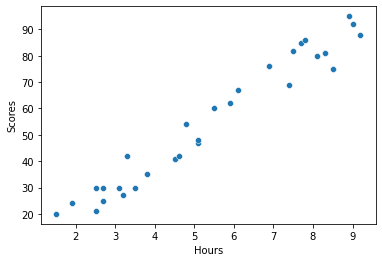

In [155]:
sns.scatterplot(x="Hours",y="Scores",data = df)
plt.show()

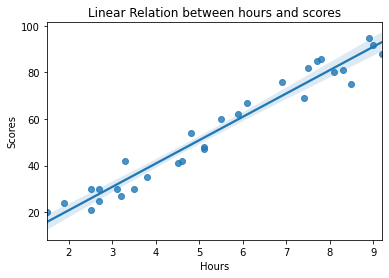

In [156]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.title("Linear Relation between hours and scores")
plt.show()

In [157]:
x = df[['Hours']]
y = df['Scores']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [158]:
from sklearn import datasets, linear_model, metrics

In [159]:
reg = linear_model.LinearRegression()

In [160]:
y_train

22    35
5     20
16    30
8     81
14    48
23    76
20    30
1     47
29    82
6     88
4     30
18    67
19    69
9     25
7     60
25    92
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [161]:
reg.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred = reg.predict(x_test)
y_pred

array([32.53854159, 81.00542828, 33.52766172, 77.04894774, 31.54942145,
       78.03806787, 46.3862235 , 59.24478528, 19.67997981])

In [163]:
a = pd.DataFrame({'actual':y_test,'predict':y_pred})
a

,actual,predict
2,27,32.538542
28,80,81.005428
13,42,33.527662
10,85,77.048948
26,30,31.549421
24,86,78.038068
27,42,46.386223
11,62,59.244785
17,24,19.679980


In [164]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den
B0 = mean_y - B1*mean_x

In [165]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [166]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,25.860330
1,5.1,47,51.926084
2,3.2,27,32.878033
3,8.5,75,86.012069
4,3.5,30,35.885620


In [167]:
df['Result'] = df['predicted_Scores']>=40

In [168]:
df.head()

,Hours,Scores,predicted_Scores,Result
0,2.5,21,25.860330,False
1,5.1,47,51.926084,True
2,3.2,27,32.878033,False
3,8.5,75,86.012069,True
4,3.5,30,35.885620,False


In [169]:
df['Result']=df['Result'].astype(str)


In [170]:
df['Pass/Fail']=df.Result.replace({'True':'Passed','False':'Failed'})

In [171]:
df.head()

,Hours,Scores,predicted_Scores,Result,Pass/Fail
0,2.5,21,25.860330,False,Failed
1,5.1,47,51.926084,True,Passed
2,3.2,27,32.878033,False,Failed
3,8.5,75,86.012069,True,Passed
4,3.5,30,35.885620,False,Failed
